# Classification using K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a supervised method to classify data.  Data points are classified based on their values for each feature and how close those values are to a certain number of already classified data points.

### More details on how it works
  
* First you choose a value of K. Make sure it is an odd number so you don't end up with ties!
* The previously labeled data points (training) are placed in multi-dimensional space.  The number of dimensions corresponds to the number of features for each data point.  If there are 3 features, it will be 3-D space, 4 features will be 4-D space, etc. 
* Add a new, unlabeled data point that you wish to classify. 
* Find the K labeled points closest to the new data point.  For example, if K=5, then find the 5 labeled data points closest to the newly input data point. 
* Determine which class each of the K data points is in.  The newly input data point is then classified in the majority class.  This is why it is important for K to be odd.

* KNN differs from K-means, an unsupervised method, in that with KNN you already know which class each data point is in before you place the new data point.



The visual below shows how the K-nearest neighbor algorithm works.  In this image, there are only 2 features for each data point, so the classification is done on just 2 dimensions.  High dimensions can be quite difficult to visualize.  For this example, if K=3, then the new data point (the yellow square) will be classified as Class B because the 3 closest data points  are 2 green triangles and 1 red star.  If K=5, then the yellow square is classified as Class A.  You can see how the selection of K can make a significant difference.

![title](./images/KNN_01.JPG)

In [1]:
# Imports
import matplotlib.pyplot as plt  
import numpy as np  
import pandas as pd  
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Let's see KNN in action using the famous Iris dataset
(https://archive.ics.uci.edu/ml/datasets/iris)

![title](./images/Irises.jpg)


Image from: https://www.brecks.com/product/rainbow-iris-collection-09163?p=0729246&gclid=Cj0KCQjwqfz6BRD8ARIsAIXQCf29HuYf78xx1Tntdluq6lLqHBK7VrIVggfz2IC24FF44s8UM-euKYMaAjJjEALw_wcB

### Import the Iris dataset

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()

# Print the class names 
# These are the names of the Iris species.  We are trying to classify 
# new, previously unclassified irises as one of these species.
print("***Class Names***")
for item in iris.target_names:
    print(item)

# Print the feature names
# These are the values we will use to perform our classifications
print("\n***Feature Names***")
for item in iris.feature_names:
    print(item)
    
print("\n")

# Define features and target from the dataframe that was created by importing the dataset
# X will be all 4 features
X = iris.data[:, :4]
# y is the type of flower
y = iris.target


***Class Names***
setosa
versicolor
virginica

***Feature Names***
sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)




### Create our KNN model to classify new, previously unclassified flowers based upon their values for the 4 features

In [3]:
# Create train/test splits
rs = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

# Instantiate the KNeighborsClassifier, setting k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

### See how well our classification model performs.

In [4]:
# Make predictions using the test data
y_pred = knn.predict(X_test)

# Show the accuracy of the predictions
print("Test set accuracy: {:.2f}%".format(knn.score(X_test, y_test)*100))

Test set accuracy: 96.67%


### Test the new model by making a prediction based on unseen data

In [5]:
# Create a new sample and use the model built above to predict the species
x_new = np.array([[0.1, 8.6, 2.3, 4.1]])

# Predict the class for this new sample
prediction = knn.predict(x_new)
print("The predicted class for this sample is " + str(iris['target_names'][prediction][0]) + ".")
print("The correct class is setosa.")


The predicted class for this sample is setosa.
The correct class is setosa.


### How can we determine what the best value for K is?  Let's loop through some values and find out.

In [6]:
# Create a list to store the accuracy we get for each different value of K
accuracy_list = []
# Let's try K from 1-20
k_range = range(1,21)

# Try values of K from 1 to 20
for i in k_range:

    # Instantiate the KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=i)

    # Train the model
    knn.fit(X_train, y_train)

    # Make predictions using the test data
    y_pred = knn.predict(X_test)
    
    # Add the accuracy we got for this prediction to our list
    accuracy_list.append(knn.score(X_test, y_test))

    # Show the accuracy for all the predictions
    print("When K={:,d}, then the accuracy is {:.2f}%".format(int(i), knn.score(X_test, y_test)*100))
    

When K=1, then the accuracy is 100.00%
When K=2, then the accuracy is 96.67%
When K=3, then the accuracy is 96.67%
When K=4, then the accuracy is 100.00%
When K=5, then the accuracy is 96.67%
When K=6, then the accuracy is 100.00%
When K=7, then the accuracy is 100.00%
When K=8, then the accuracy is 100.00%
When K=9, then the accuracy is 100.00%
When K=10, then the accuracy is 100.00%
When K=11, then the accuracy is 100.00%
When K=12, then the accuracy is 100.00%
When K=13, then the accuracy is 100.00%
When K=14, then the accuracy is 100.00%
When K=15, then the accuracy is 100.00%
When K=16, then the accuracy is 100.00%
When K=17, then the accuracy is 100.00%
When K=18, then the accuracy is 100.00%
When K=19, then the accuracy is 100.00%
When K=20, then the accuracy is 100.00%


# Let's plot our accuracies
The plot will allow us to quickly see what value of K is best.  You may notice something interesting.  With the test set we used, any value greater than or equal to 6 will perform very well.  Try changing the line "rs=0" to a different number and see how the value accuracy values and the graph change.

<function matplotlib.pyplot.show(*args, **kw)>

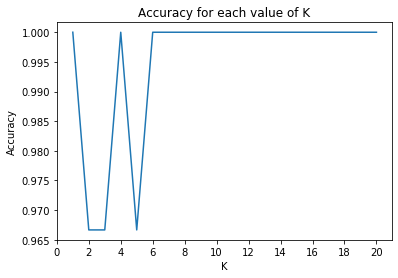

In [7]:
# Plot the accuracy vs K
plt.plot(k_range, accuracy_list)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy for each value of K")
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.show

Credits
* https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75
* https://medium.com/datadriveninvestor/k-nearest-neighbors-knn-7b4bd0128da7
* https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
* https://www.kaggle.com/crowemi/iris-classification-k-nearest-neighbors



Last Updated 9/14/20